In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from ruamel.yaml import YAML
import matplotlib.ticker as ticker

import os
import sys 
sys.path.append("../src")
from Fitness.PMO import Calculate_PMO


In [2]:
yaml = YAML()
main_path = os.getcwd()
with open("../data/Info_species_fitness.yaml", "r") as f:
    data = yaml.load(f)
Name_Folder = "0D_1case"
flag_output= True

data_d = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_Detailed.csv")
data_r = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_Reduced.csv")
data_o = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_OPTIM_A.csv")
data_ob = pd.read_csv(f"/work/kotlarcm/WORK/Automated_Reduced/{Name_Folder}/Processing_OPTIM_B.csv")

In [3]:
Err_r,F1r,F2r,F3r,F4r = Calculate_PMO(data_d,data_r,data,main_path,flag_output)
Err_A,F1o,F2o,F3o,F4o = Calculate_PMO(data_d,data_o,data,main_path,flag_output)
Err_B,F1ob,F2ob,F3ob,F4ob = Calculate_PMO(data_d,data_ob,data,main_path,flag_output)
integrate_species = [species for species, values in data.items() if values["Integrate"] == 1]
peak_species = [species for species, values in data.items() if values["Peak"] == 1]

Err PMO = 7.64e-01
Err PMO = 7.77e-01
Err PMO = 9.24e-01


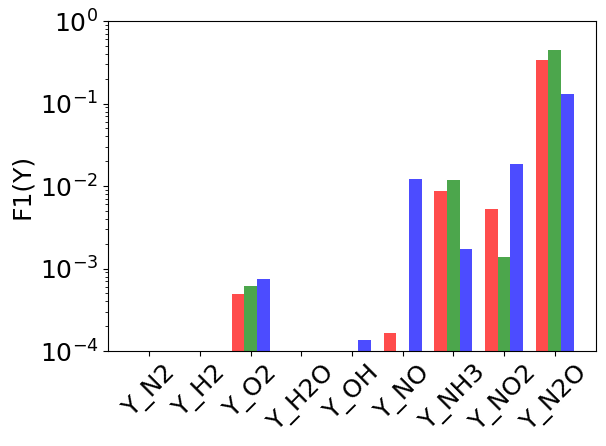

In [4]:

# Définir la largeur des barres
bar_width = 0.25
plt.rcParams.update({'font.size': 18})
plt.figure()

# Positions sur l'axe des x pour chaque barre (en fonction du nombre d'espèces)
x = np.arange(len(integrate_species))

# Ajouter les barres pour F1r[0], F1o[0] et F1ob[0]
plt.bar(x - bar_width, F1r[0], width=bar_width,color="r", label="Reduced", alpha=0.7)
plt.bar(x, F1o[0], width=bar_width,color= "g", label="OPTIM A", alpha=0.7)
plt.bar(x + bar_width, F1ob[0], width=bar_width, color="b",label="OPTIM B", alpha=0.7)

# Ajouter des titres et des labels

plt.ylabel("F1(Y)")
plt.ylim([1e-4,1e0])
plt.xticks(x, integrate_species, rotation=45)
plt.yscale("log")
plt.tight_layout()
plt.savefig("PMO_Err_F1.png")

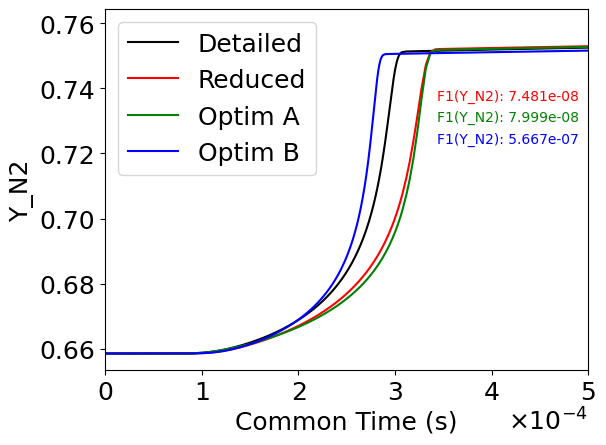

In [5]:
species = "Y_N2"
plt.figure()

# Tracé des courbes
plt.plot(data_d["common_grid"], data_d[species], 'k', label="Detailed")
plt.plot(data_d["common_grid"], data_r[species], 'r', label="Reduced")
plt.plot(data_d["common_grid"], data_o[species], 'g', label="Optim A")
plt.plot(data_d["common_grid"], data_ob[species], 'b', label="Optim B")

# Limites, légendes et axes
plt.xlim([0, 0.0005])
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.legend()
plt.ylabel(f"{species}")
plt.xlabel("Common Time (s)")

# Récupération des valeurs
val_r = F1r[0][integrate_species.index(species)]
val_o = F1o[0][integrate_species.index(species)]
val_ob = F1ob[0][integrate_species.index(species)]

# Position de départ du texte (en coordonnées Axes)
x_text = 0.98
y_start = 0.78
line_spacing = 0.06

# Texte coloré
plt.gca().text(x_text, y_start,     f"F1({species}): {val_r:.3e}", color='r',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')
plt.gca().text(x_text, y_start - line_spacing, f"F1({species}): {val_o:.3e}", color='g',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')
plt.gca().text(x_text, y_start - 2*line_spacing, f"F1({species}): {val_ob:.3e}", color='b',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig(f"PMO_F1_{species}.png")


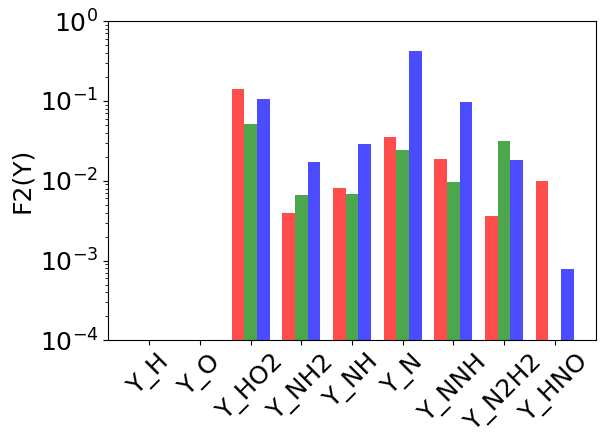

In [6]:

# Définir la largeur des barres
bar_width = 0.25
plt.rcParams.update({'font.size': 18})
plt.figure()

# Positions sur l'axe des x pour chaque barre (en fonction du nombre d'espèces)
x = np.arange(len(peak_species))

# Ajouter les barres pour F1r[0], F1o[0] et F1ob[0]
plt.bar(x - bar_width, F2r[0], width=bar_width,color="r", label="Reduced", alpha=0.7)
plt.bar(x, F2o[0], width=bar_width,color= "g", label="OPTIM A", alpha=0.7)
plt.bar(x + bar_width, F2ob[0], width=bar_width, color="b",label="OPTIM B", alpha=0.7)

# Ajouter des titres et des labels

plt.ylabel("F2(Y)")
plt.xticks(x, peak_species, rotation=45)
plt.yscale("log")
plt.ylim([1e-4,1e0])
plt.tight_layout()
plt.savefig("PMO_Err_F2.png")

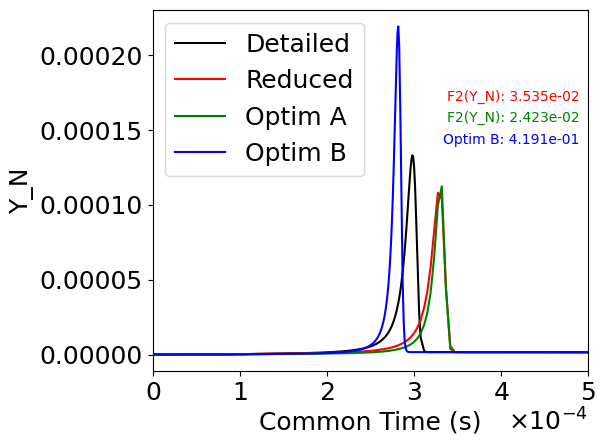

In [7]:
species = "Y_N"
plt.figure()

# Tracé des courbes
plt.plot(data_d["common_grid"], data_d[species], 'k', label="Detailed")
plt.plot(data_d["common_grid"], data_r[species], 'r', label="Reduced")
plt.plot(data_d["common_grid"], data_o[species], 'g', label="Optim A")
plt.plot(data_d["common_grid"], data_ob[species], 'b', label="Optim B")

# Limites, légendes et axes
plt.xlim([0, 0.0005])
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.legend()
plt.ylabel(f"{species}")
plt.xlabel("Common Time (s)")

# Récupération des valeurs
val_r = F2r[0][peak_species.index(species)]
val_o = F2o[0][peak_species.index(species)]
val_ob = F2ob[0][peak_species.index(species)]

# Position de départ du texte (en coordonnées Axes)
x_text = 0.98
y_start = 0.78
line_spacing = 0.06

# Texte coloré
plt.gca().text(x_text, y_start,     f"F2({species}): {val_r:.3e}", color='r',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')
plt.gca().text(x_text, y_start - line_spacing, f"F2({species}): {val_o:.3e}", color='g',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')
plt.gca().text(x_text, y_start - 2*line_spacing, f"Optim B: {val_ob:.3e}", color='b',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig(f"PMO_F2_{species}.png")


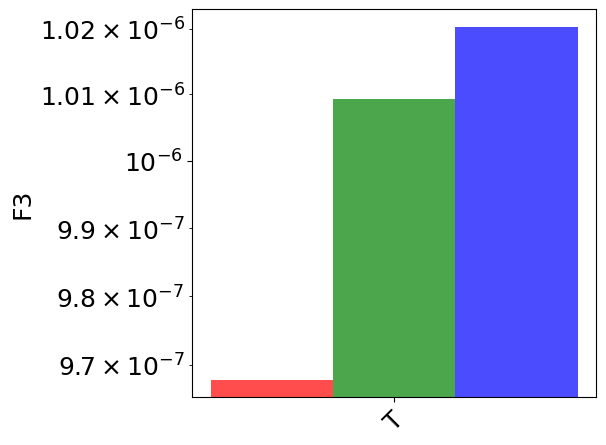

In [8]:

# Définir la largeur des barres
bar_width = 0.25
plt.rcParams.update({'font.size': 18})
plt.figure()

# Positions sur l'axe des x pour chaque barre (en fonction du nombre d'espèces)
x = np.arange(len(["T"]))

# Ajouter les barres pour F1r[0], F1o[0] et F1ob[0]
plt.bar(x - bar_width, F3r[0], width=bar_width,color="r", label="Reduced", alpha=0.7)
plt.bar(x, F3o[0], width=bar_width,color= "g", label="OPTIM A", alpha=0.7)
plt.bar(x + bar_width, F3ob[0], width=bar_width, color="b",label="OPTIM B", alpha=0.7)

# Ajouter des titres et des labels

plt.ylabel("F3")
plt.xticks(x, ["T"], rotation=45)
plt.yscale("log")
plt.tight_layout()
plt.savefig("PMO_Err_F3.png")

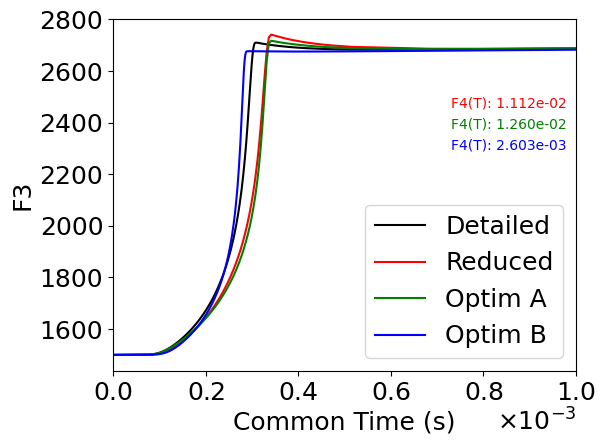

In [9]:
species = "T"
plt.figure()

# Tracé des courbes
plt.plot(data_d["common_grid"], data_d[species], 'k', label="Detailed")
plt.plot(data_d["common_grid"], data_r[species], 'r', label="Reduced")
plt.plot(data_d["common_grid"], data_o[species], 'g', label="Optim A")
plt.plot(data_d["common_grid"], data_ob[species], 'b', label="Optim B")

# Limites, légendes et axes
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.legend()
plt.xlim([0,10e-4])
plt.ylabel(f"F3")
plt.xlabel("Common Time (s)")

# Récupération des valeurs
val_r = F4r[0]
val_o = F4o[0]
val_ob = F4ob[0]

# Position de départ du texte (en coordonnées Axes)
x_text = 0.98
y_start = 0.78
line_spacing = 0.06

# Texte coloré
plt.gca().text(x_text, y_start,     f"F4({species}): {val_r:.3e}", color='r',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')
plt.gca().text(x_text, y_start - line_spacing, f"F4({species}): {val_o:.3e}", color='g',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')
plt.gca().text(x_text, y_start - 2*line_spacing, f"F4({species}): {val_ob:.3e}", color='b',
               transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right')

plt.tight_layout()
plt.savefig(f"PMO_F3_T.png")


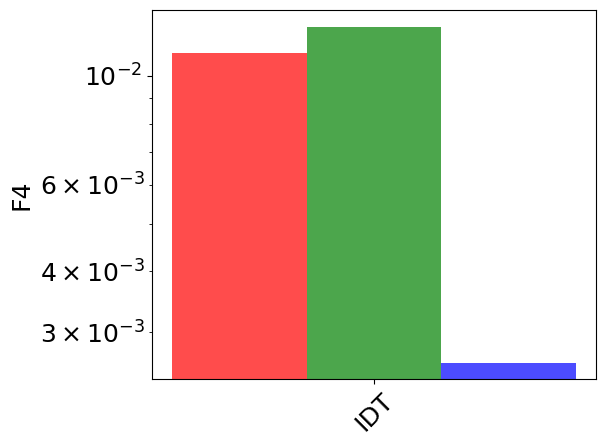

In [10]:

# Définir la largeur des barres
bar_width = 0.25
plt.rcParams.update({'font.size': 18})
plt.figure()

# Positions sur l'axe des x pour chaque barre (en fonction du nombre d'espèces)
x = np.arange(len(["IDT"]))

# Ajouter les barres pour F1r[0], F1o[0] et F1ob[0]
plt.bar(x - bar_width, F4r[0], width=bar_width,color="r", label="Reduced", alpha=0.7)
plt.bar(x, F4o[0], width=bar_width,color= "g", label="OPTIM A", alpha=0.7)
plt.bar(x + bar_width, F4ob[0], width=bar_width, color="b",label="OPTIM B", alpha=0.7)

# Ajouter des titres et des labels

plt.ylabel("F4")
plt.xticks(x, ["IDT"], rotation=45)
plt.yscale("log")
plt.tight_layout()
plt.savefig("PMO_Err_F4.png")